In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_data = pd.read_csv('Genre Classification Dataset\\train_data.txt', delimiter=':::', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
test_data = pd.read_csv('Genre Classification Dataset\\test_data.txt', delimiter=':::', header=None, names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')
test_data_solution = pd.read_csv('Genre Classification Dataset\\test_data_solution.txt', delimiter=':::', header=None, names=['ID','TITLE', 'GENRE','DESCRIPTION'], engine='python')

In [3]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_data.shape

(54214, 4)

In [5]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [6]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [7]:
test_data_solution.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


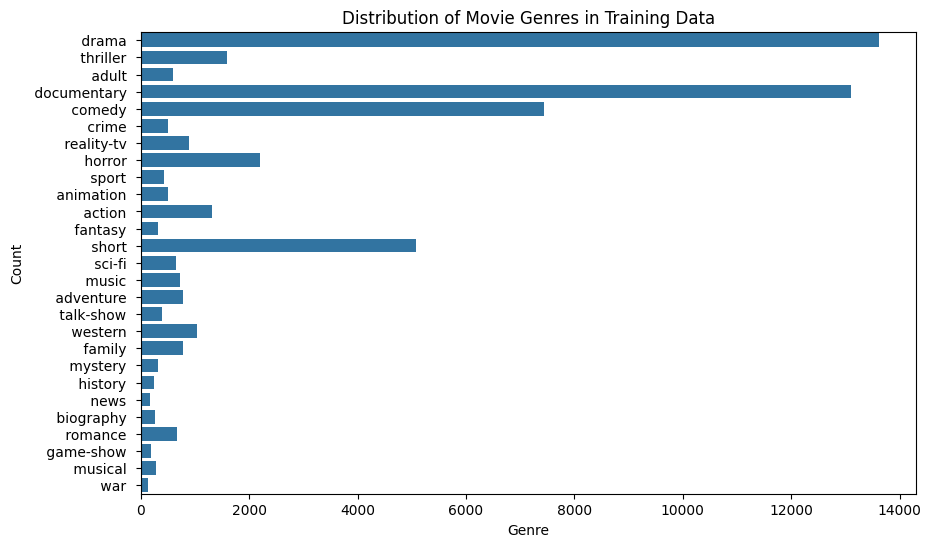

In [8]:
# Explore the distribution of genres in the training data
plt.figure(figsize=(10, 6))
sns.countplot(y='GENRE', data=train_data)
plt.title('Distribution of Movie Genres in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

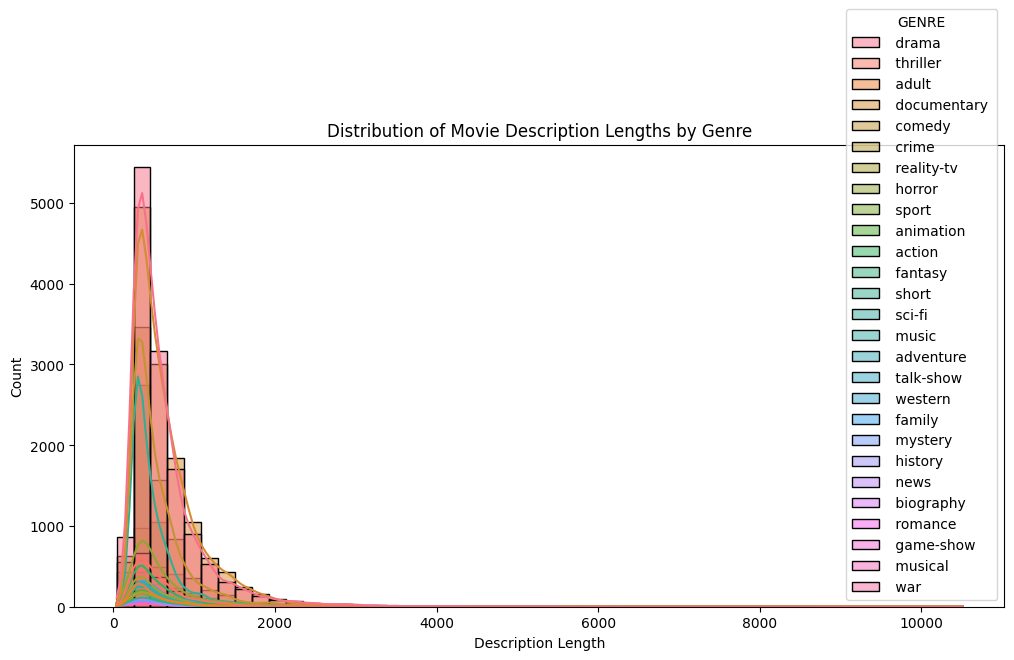

In [9]:
# Explore the length of movie descriptions
train_data['Description_Length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Description_Length', hue='GENRE', bins=50, kde=True)
plt.title('Distribution of Movie Description Lengths by Genre')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.show()

In [10]:
# Split the training data into features and labels
X_train = train_data['DESCRIPTION']
y_train = train_data['GENRE']

In [11]:
# Create a CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)


In [12]:
# Apply over-sampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_vectorized, y_train)


In [13]:
# Split the data into training and testing sets
X_train_resampled, X_validation_resampled, y_train_resampled, y_validation_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [14]:
# Create a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [15]:
# Make predictions on the validation set
predictions_validation = classifier.predict(X_validation_resampled)

In [16]:
# Evaluate the model on the validation set
accuracy_validation = accuracy_score(y_validation_resampled, predictions_validation)
report_validation = classification_report(y_validation_resampled, predictions_validation)

In [17]:
print(f"\nAccuracy on the validation set: {accuracy_validation:.2f}")
print("Classification Report on the validation set:")
print(report_validation)


Accuracy on the validation set: 0.91
Classification Report on the validation set:
               precision    recall  f1-score   support

      action        0.89      0.87      0.88      2626
       adult        0.95      0.97      0.96      2761
   adventure        0.96      0.89      0.92      2684
   animation        0.98      0.96      0.97      2790
   biography        0.98      0.98      0.98      2710
      comedy        0.78      0.65      0.71      2712
       crime        0.96      0.96      0.96      2691
 documentary        0.65      0.77      0.70      2667
       drama        0.58      0.58      0.58      2775
      family        0.95      0.90      0.92      2696
     fantasy        0.98      0.97      0.98      2854
   game-show        0.99      0.99      0.99      2700
     history        0.98      1.00      0.99      2763
      horror        0.82      0.93      0.87      2697
       music        0.91      0.96      0.94      2696
     musical        1.00      0.97  

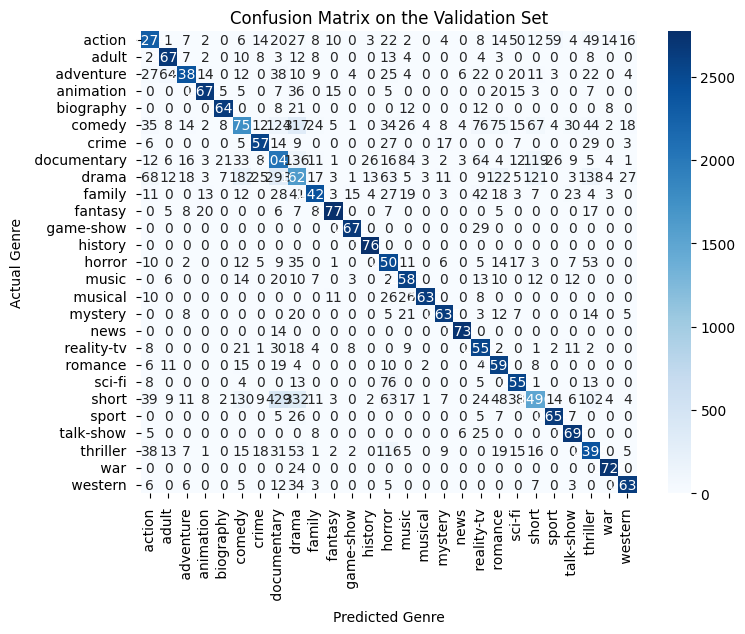

In [19]:
# Plot the confusion matrix on the validation set
cm_validation = confusion_matrix(y_validation_resampled, predictions_validation)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validation, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix on the Validation Set')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.show()

In [20]:
# Make predictions on the test set
test_data_vectorized = vectorizer.transform(test_data['DESCRIPTION'])
predictions = classifier.predict(test_data_vectorized)

In [21]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(test_data_solution['GENRE'], predictions)
report_test = classification_report(test_data_solution['GENRE'], predictions)

In [22]:
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(report_test)


Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

      action        0.38      0.48      0.42      1314
       adult        0.50      0.51      0.51       590
   adventure        0.33      0.22      0.26       775
   animation        0.33      0.19      0.24       498
   biography        0.06      0.03      0.04       264
      comedy        0.60      0.49      0.54      7446
       crime        0.19      0.15      0.17       505
 documentary        0.70      0.77      0.73     13096
       drama        0.63      0.58      0.61     13612
      family        0.30      0.21      0.25       783
     fantasy        0.20      0.12      0.15       322
   game-show        0.85      0.63      0.72       193
     history        0.13      0.07      0.09       243
      horror        0.51      0.69      0.59      2204
       music        0.40      0.73      0.52       731
     musical        0.23      0.08      0.12       276
     mystery        0.18  

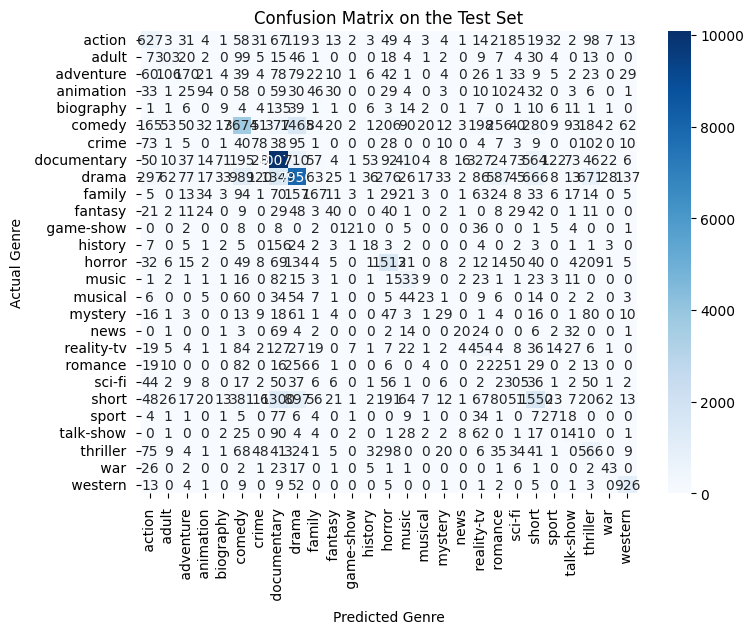

In [23]:
# Plot the confusion matrix on the test set
cm_test = confusion_matrix(test_data_solution['GENRE'], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix on the Test Set')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.show()